In [1]:
import copy,math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cost(x, y, w,b):
        
    m =len(y)
    cost = 0   
    y_pred = x.dot(w) + b
    cost = np.sum(( y_pred - y) ** 2)
    cost = cost / (2*m)
    return cost

In [3]:
def gradient_descent(x,y,w,b,cost,alpha,num_iters):
    j_hist = []
    for i in range(num_iters):
        y_pred= x.dot(w) + b
        dw = (1/x.shape[0])* np.dot(x.T,y_pred - y)
        db = (1/x.shape[0])* np.sum(y_pred - y)
        w = w - alpha * dw
        b = b - alpha * db
        if i<100000:
            j_hist.append( cost(x,y,w,b))
        if i% math.ceil(num_iters/10) == 0:
            print(f"iterations {i:4d}: cost {j_hist[-1]} ")
    return w, b, j_hist

In [4]:
data = pd.read_csv('Lineardata_train.csv', usecols= range(21))
seed = 42
data_shuffled = data.sample(frac=1, random_state=seed)
split_index = int(0.8 * len(data_shuffled))
data_shuffled = data_shuffled.values
train_data = data_shuffled[:split_index]
test_data = data_shuffled[split_index:]
x_train = train_data[:,1:]
y_train = train_data[:,0]
x_test = test_data[:,1:]
y_test = test_data[:,0]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 20)
(10000, 20)
(40000,)
(10000,)


In [5]:
data_test = pd.read_csv('Lineardata_test.csv', usecols= range(21)).values
x_test_real= data_test[:,1:]

In [6]:
w = np.zeros(x_train.shape[1])
b = 0
alpha = 0.000036
num_iters = 2000

w_final, b_final, j_hist = gradient_descent(x_train,y_train,w,b,cost, alpha,num_iters)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}")

iterations    0: cost 62090226.23721322 
iterations  200: cost 594777.9909577314 
iterations  400: cost 232237.53853083478 
iterations  600: cost 99090.93021721985 
iterations  800: cost 44798.26751612424 
iterations 1000: cost 21884.46839278051 
iterations 1200: cost 11796.59631659699 
iterations 1400: cost 7081.022994956909 
iterations 1600: cost 4694.795203178735 
iterations 1800: cost 3369.946262473458 
b,w found by gradient descent: 1.58,[  1.50355122   5.03005395   1.70544932   1.12097476  29.87375026
  50.94459016  23.00891611  44.99804477  23.01709489  11.60614738
  11.05695481 198.12790132  66.98984337  81.97875497  11.99875753
  44.99948345  22.99830418  45.04924774  88.00676542  10.02020496]


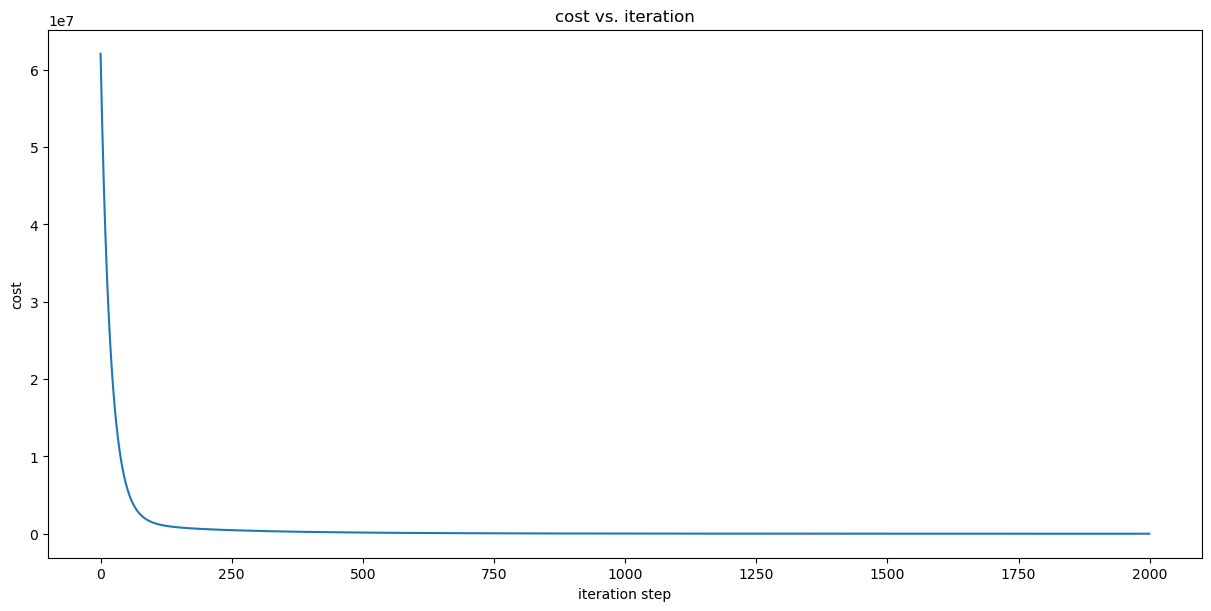

In [7]:
fig, ax1 = plt.subplots(constrained_layout=True, figsize=(12,6))
ax1.plot(j_hist[:2000])
ax1.set_title("cost vs. iteration")
ax1.set_ylabel('cost')
ax1.set_xlabel('iteration step')
plt.show()


In [8]:
y_train_pred = np.dot(x_train,w_final) + b

In [9]:
 def r2_score(y_train, y_train_pred):
        y_train_mean = np.mean(y_train)
        ss_total = np.sum((y_train - y_train_mean) ** 2)
        ss_residual = np.sum((y_train - y_train_pred) ** 2)
    
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [10]:
r2_score = r2_score(y_train, y_train_pred)
print(r2_score)

0.9999602901947264


In [11]:
def test(x,b_final,w_final):
    y_pred = np.dot(x, w_final) + b_final
    return y_pred

In [12]:
def r2_score(y_test, y_test_pred):
        y_test_mean = np.mean(y_test)
        ss_total = np.sum((y_test - y_test_mean) ** 2)
        ss_residual = np.sum((y_test - y_test_pred) ** 2)
    
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [13]:
y_test_pred = test(x_test, b_final, w_final)
r2score_test = r2_score(y_test, y_test_pred)
print(r2score_test)

0.9999607873833465


In [14]:
y_test_real_pred = test(x_test_real,b_final,w_final)
print(y_test_real_pred)

[ -5476.50576089  17524.61249226   4690.73214302 ...   9404.84561677
 -15170.23245945  -1412.02986367]
